In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

#os - operating system dependent. to read/write files
#pd - pandas for data analysis/modeling

data_path = 'data/'
dataframes_path = 'dataframes/'

#Reformated sales into one dataframe in 2.1_ReformatDailySales
trainingDaySet    = pd.read_pickle(os.path.join(data_path, 'trainingDaySet.pickle'))

In [5]:
trainingDaySet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 7 columns):
date                datetime64[ns]
date_block_num      int8
shop_id             int8
item_id             int16
item_price          float64
item_cnt_day        int16
item_category_id    int8
dtypes: datetime64[ns](1), float64(1), int16(2), int8(3)
memory usage: 86.8 MB


In [6]:
trainingDaySet.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00,4.000138e+01
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00,1.710076e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01,0.000000e+00
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00,2.800000e+01
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00,4.000000e+01
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00,5.500000e+01
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03,8.300000e+01


<h2>Daily Performance <small>regardless of shops,items,item categories</small></h2>

In [12]:
# Daily Performance for all shops
DailyPerformanceSum = trainingDaySet.copy().groupby(['date'],as_index=True).agg({'item_cnt_day':'sum'})
DailyPerformanceMean = trainingDaySet.copy().groupby(['date'],as_index=True).agg({'item_cnt_day':np.mean})
DailyPerformance = pd.merge(DailyPerformanceSum, DailyPerformanceMean, how='left', on=['date'])
DailyPerformance.columns = ['daily_sum','daily_mean']
DailyPerformance.describe()

,daily_sum,daily_mean
count,1034.000000,1034.000000
mean,3528.245648,1.242591
std,1584.687467,0.241538
min,1274.000000,1.066146
25%,2472.250000,1.145215
50%,3145.000000,1.186720
75%,4257.000000,1.251828
max,13343.000000,4.600257


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D06FE1CF8>,
      dtype=object)

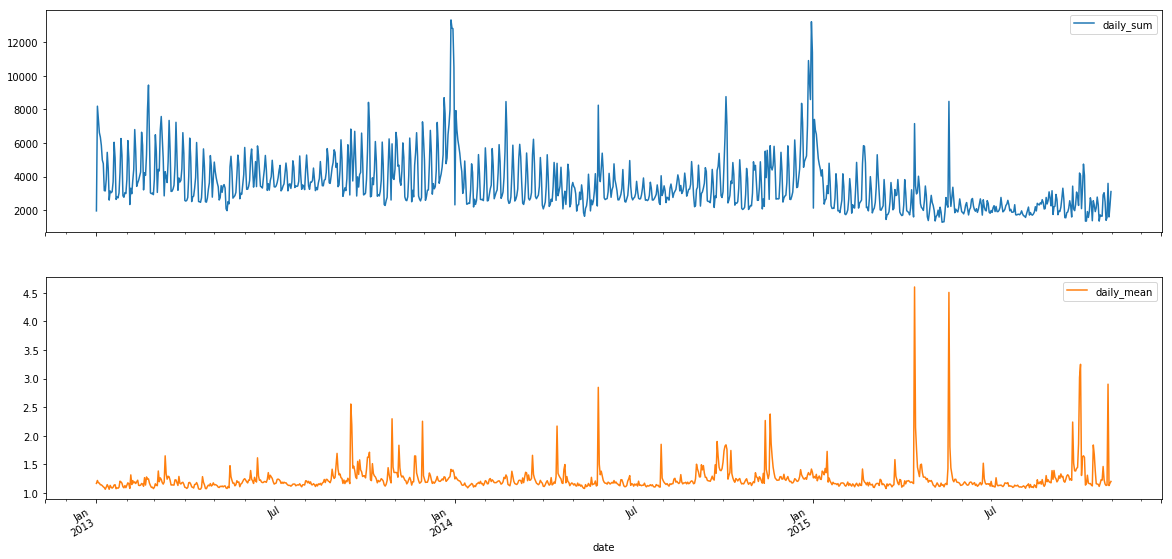

In [13]:
DailyPerformance.plot(subplots=True,figsize=(20,10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D189ACE10>],
      dtype=object)

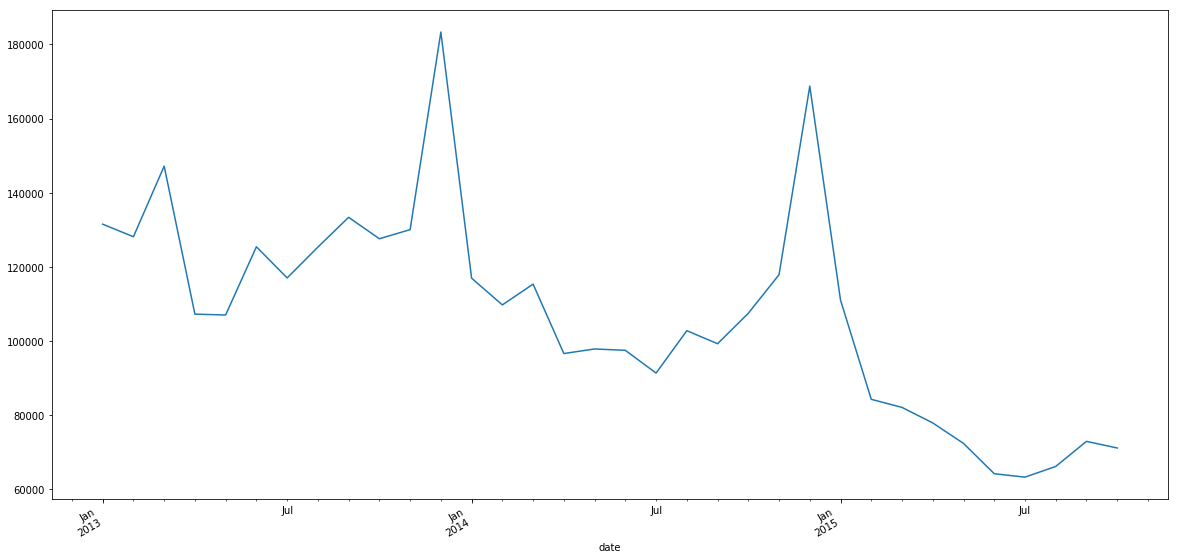

In [47]:
DailyPerformance.daily_sum.resample('M').sum().plot(subplots=True,figsize=(20,10))

<p>We could see that there are some spikes in Some months [January, february, October, December,] comparatively. Also We can see that the data set contains some seasonal affects and trend (decreasing)</p>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D14921DA0>,
      dtype=object)

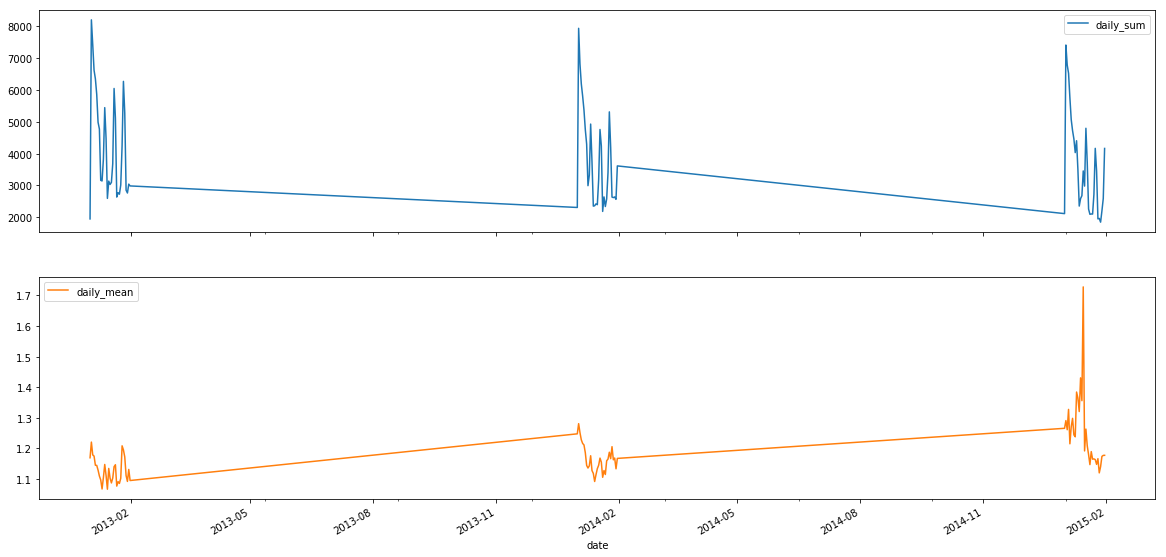

In [37]:
#January Data
DailyPerformance.loc[DailyPerformance.index.month==1].plot(subplots=True,figsize=(20,10))

<h2>Statistically checking if data is stationary or not</h2>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D07425CF8>,
      dtype=object)

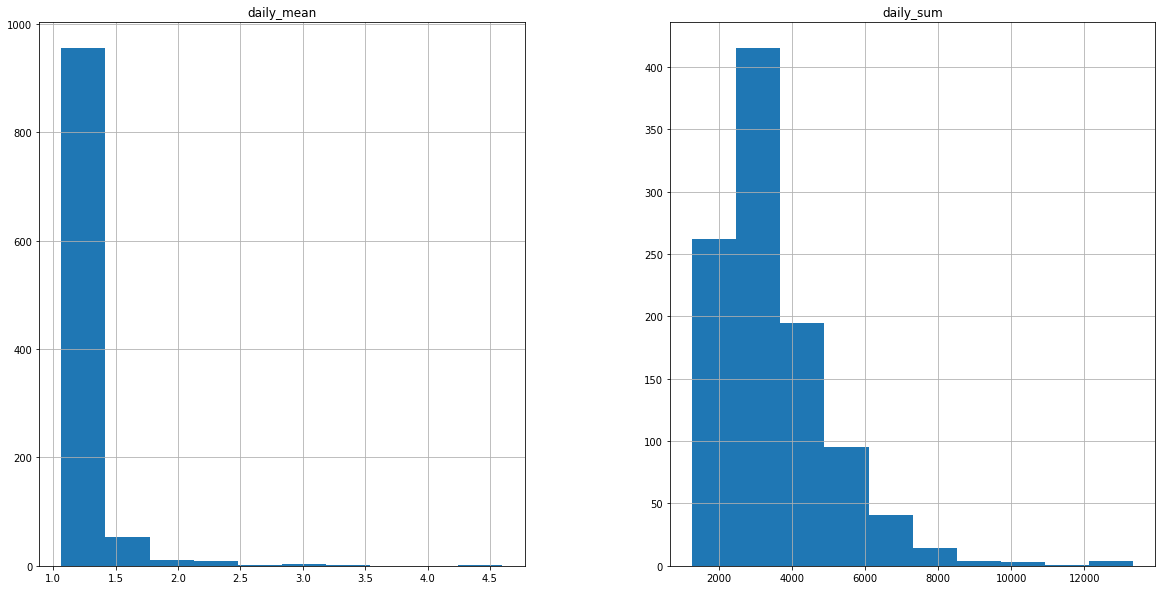

In [14]:
DailyPerformance.hist(figsize=(20,10))

In [53]:
split = (int)(len(DailyPerformance) / 2)
X1, X2 = DailyPerformance[0:split], DailyPerformance[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print("Mean:\n\nmean1:\n"+str(mean1) +"\n\nmean2:\n"+str(mean2))
print("\nMean Difference:\n"+str(abs(mean1-mean2)))
print("\n\nVariance:\n\nvar11:\n"+str(var1) +"\n\nvar2:\n"+str(var2))
print("\nVariance Difference:\n"+str(abs(var1-var2)))
#print('variance1=%f, variance2=%f' % (var1, var2))

Mean:

mean1:
daily_sum     4068.352031
daily_mean       1.225057
dtype: float64

mean2:
daily_sum     2988.139265
daily_mean       1.260125
dtype: float64

Mean Difference:
daily_sum     1080.212766
daily_mean       0.035069
dtype: float64


Variance:

var11:
daily_sum     2.434582e+06
daily_mean    2.777512e-02
dtype: float64

var2:
daily_sum     2.008193e+06
daily_mean    8.840258e-02
dtype: float64

Variance Difference:
daily_sum     426388.895266
daily_mean         0.060627
dtype: float64


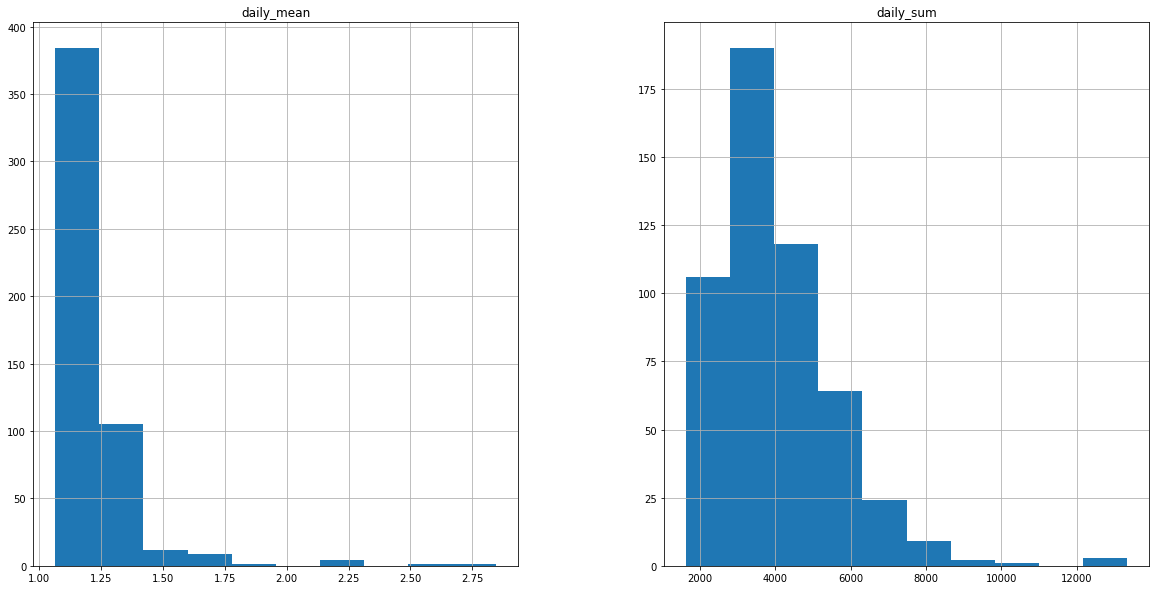

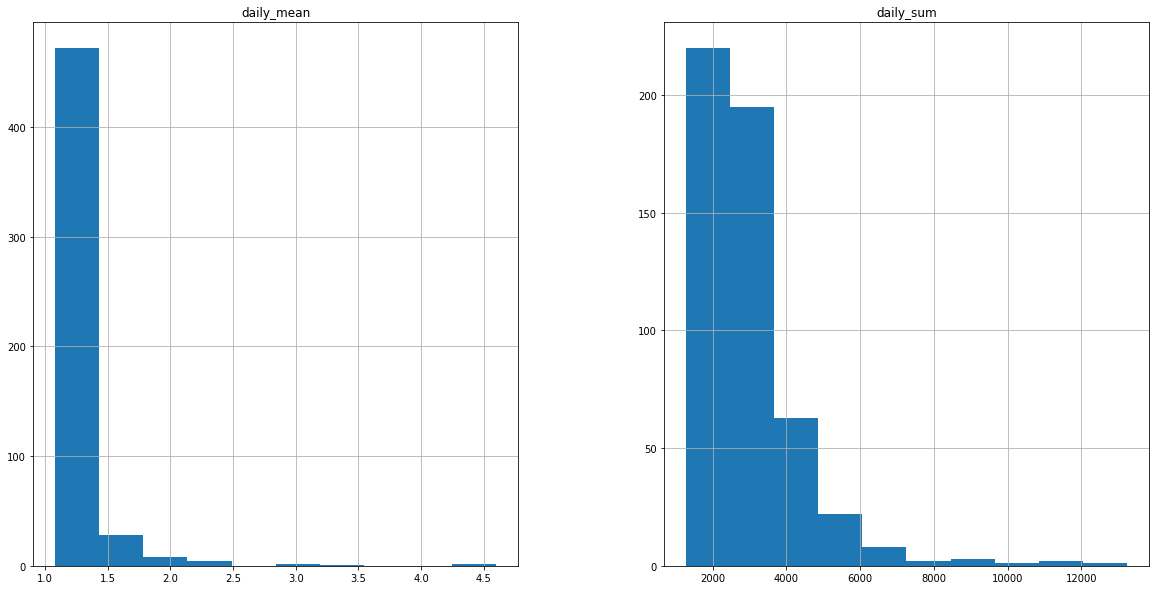

In [16]:
X1.hist(figsize=(20,10))
plt.show()
X2.hist(figsize=(20,10))
plt.show()

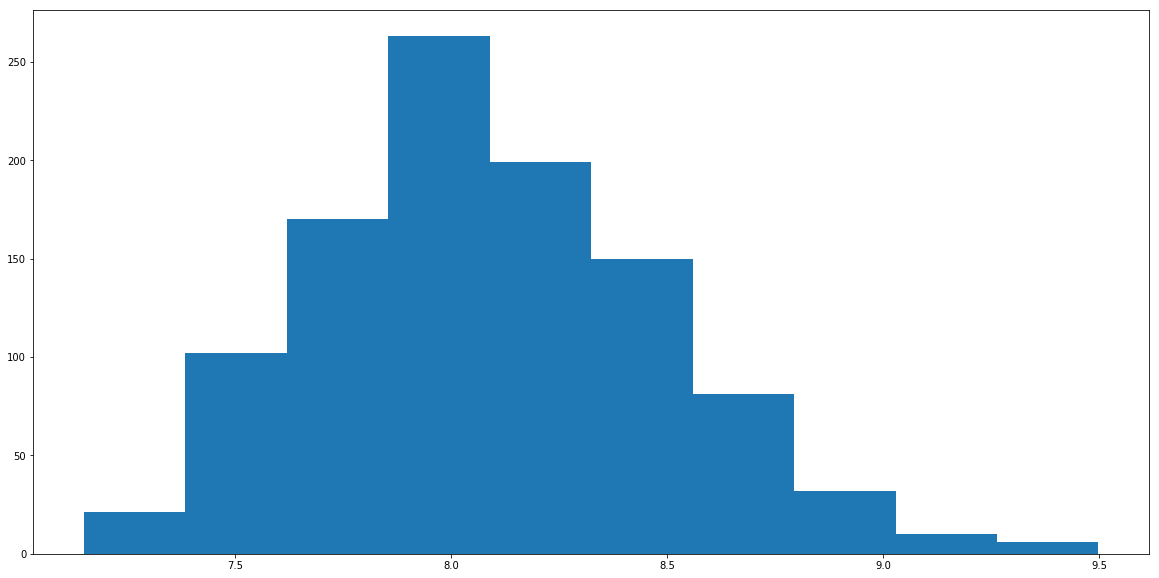

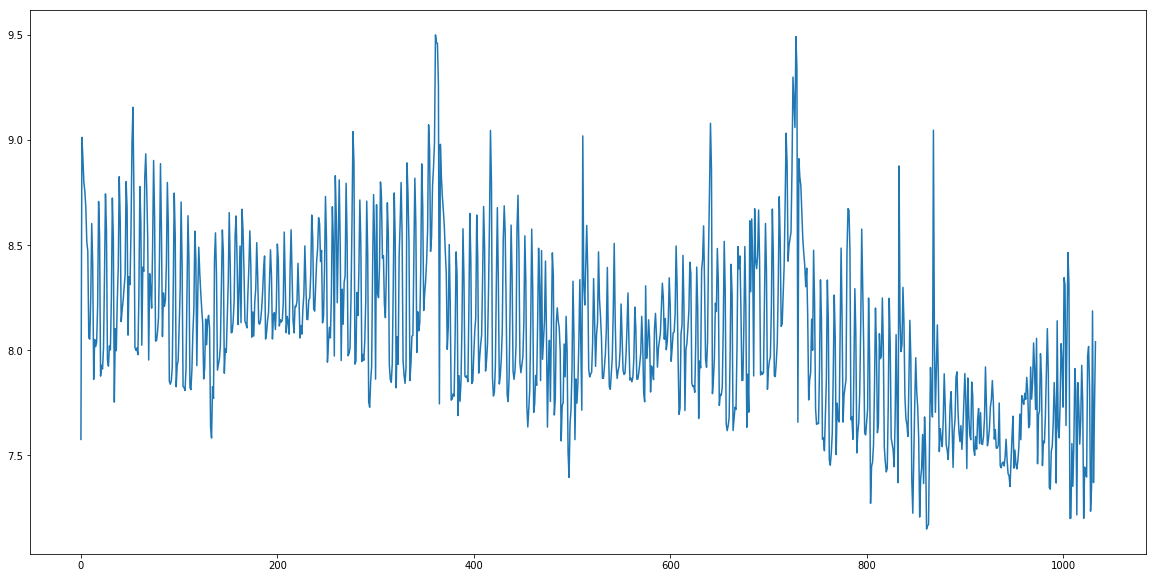

In [17]:
from numpy import log
plt.figure(figsize=(20,10))

x=DailyPerformance.daily_sum.values
x = log(x)
plt.hist(x)
plt.show()
plt.figure(figsize=(20,10))
plt.plot(x)
plt.show()

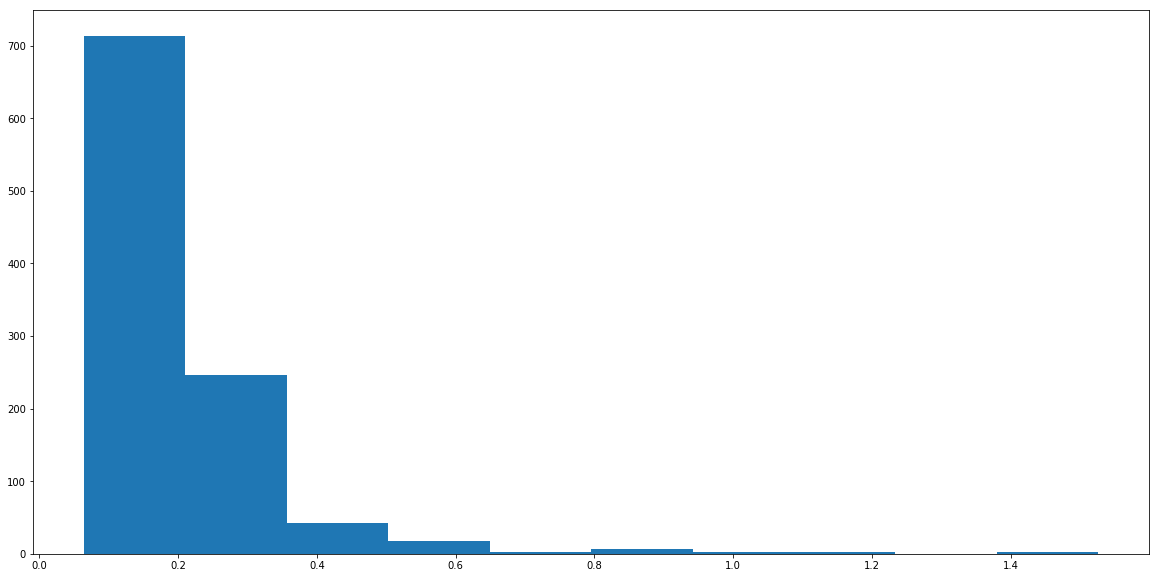

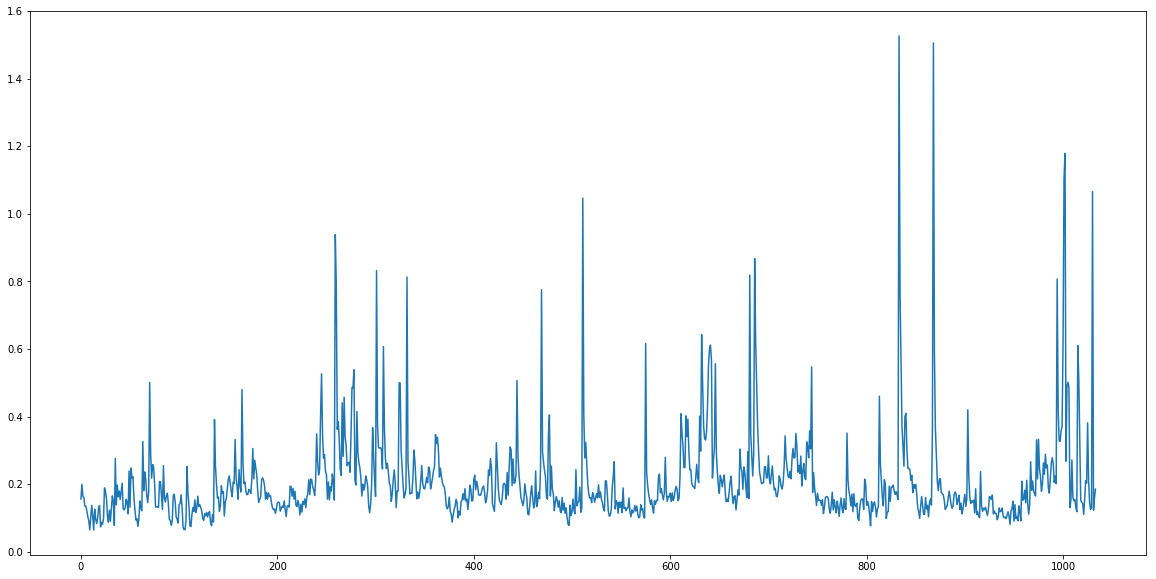

In [18]:
x=DailyPerformance.daily_mean.values
x = log(x)
plt.figure(figsize=(20,10))
plt.hist(x)
plt.show()
plt.figure(figsize=(20,10))
plt.plot(x)
plt.show()

In [54]:
x=DailyPerformance.daily_sum.values
x = log(x)
split = (int)(len(x) / 2)
x1, x2 = x[0:split], x[split:]
mean1, mean2 = x1.mean(), x2.mean()
var1, var2 = x1.var(), x2.var()
print("Mean:\n\nmean1:\n"+str(mean1) +"\n\nmean2:\n"+str(mean2))
print("\nMean Difference:\n"+str(abs(mean1-mean2)))
print("\n\nVariance:\n\nvar11:\n"+str(var1) +"\n\nvar2:\n"+str(var2))
print("\nVariance Difference:\n"+str(abs(var1-var2)))
#print('variance1=%f, variance2=%f' % (var1, var2))

Mean:

mean1:
8.249474

mean2:
7.9213805

Mean Difference:
0.32809305


Variance:

var11:
0.11646863

var2:
0.14512992

Variance Difference:
0.028661288


In [55]:
x=DailyPerformance.daily_mean.values
x = log(x)
split = (int)(len(x) / 2)
x1, x2 = x[0:split], x[split:]
mean1, mean2 = x1.mean(), x2.mean()
var1, var2 = x1.var(), x2.var()
print("Mean:\n\nmean1:\n"+str(mean1) +"\n\nmean2:\n"+str(mean2))
print("\nMean Difference:\n"+str(abs(mean1-mean2)))
print("\n\nVariance:\n\nvar11:\n"+str(var1) +"\n\nvar2:\n"+str(var2))
print("\nVariance Difference:\n"+str(abs(var1-var2)))

Mean:

mean1:
0.19616001887078857

mean2:
0.21567680786343216

Mean Difference:
0.019516788992643586


Variance:

var11:
0.011928801928834982

var2:
0.024178372400430328

Variance Difference:
0.012249570471595346


<p>Concluded that data is not stationary looking at daily sales. <i>  stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time. </i></p>

In [11]:
trainingDaySet['item_cnt_day'].value_counts()

 1       2629372
 2        194201
 3         47350
 4         19685
 5         10474
-1          7252
 6          6338
 7          4057
 8          2903
 9          2177
 10         1820
 11         1263
 12         1083
 13          918
 14          716
 15          638
 16          544
 17          438
 18          391
 20          364
 19          347
 21          290
 22          242
 24          204
 23          198
 25          180
 26          176
 30          147
 28          131
 27          130
          ...   
 131           1
 132           1
 2169          1
 135           1
 93            1
 95            1
 140           1
 96            1
-16            1
 146           1
 147           1
 118           1
 149           1
 154           1
 217           1
 156           1
 157           1
 161           1
 163           1
 164           1
 167           1
 102           1
 105           1
 179           1
 187           1
 194           1
 195           1
 200          